In [3]:
# import cv2
# import time
# import rawpy
# import skimage
# import flow_vis
# import numpy as np
# import matplotlib.pyplot as plt

# from pathlib import Path
# from scipy.signal import correlate
# from scipy.signal import fftconvolve, convolve
# from scipy.interpolate import RectBivariateSpline
# from skimage.color import rgb2gray
# from skimage.filters import gaussian

from src.alignment.alignment import OpticalFlowProcessor

In [4]:
# import cv2
import time
import rawpy
import skimage
import flow_vis
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
# from scipy.signal import correlate
# from scipy.signal import fftconvolve, convolve
# from scipy.interpolate import RectBivariateSpline
# from skimage.color import rgb2gray
# from skimage.filters import gaussian

# from src.alignment.alignment import align_block_based, get_lk_optical_flow

In [5]:
def open_raw_images_with_downsample(dir_path: str):
    for path in Path(dir_path).glob('*.dng'):
        with rawpy.imread(str(path)) as raw:
            yield raw.postprocess(half_size=True)

In [6]:
imgs = list(open_raw_images_with_downsample('./imgs6'))

In [7]:
# up, down, left, right = 500, 1500, 400, 1200
up, down, left, right = 0, 3000, 0, 3000

In [8]:
img1 = imgs[0][up:down, left:right]
small1 = skimage.transform.resize(img1, (img1.shape[0] // 4, img1.shape[1] // 4), anti_aliasing=True)

img2 = imgs[5][up:down, left:right]
small2 = skimage.transform.resize(img2, (img2.shape[0] // 4, img2.shape[1] // 4), anti_aliasing=True)

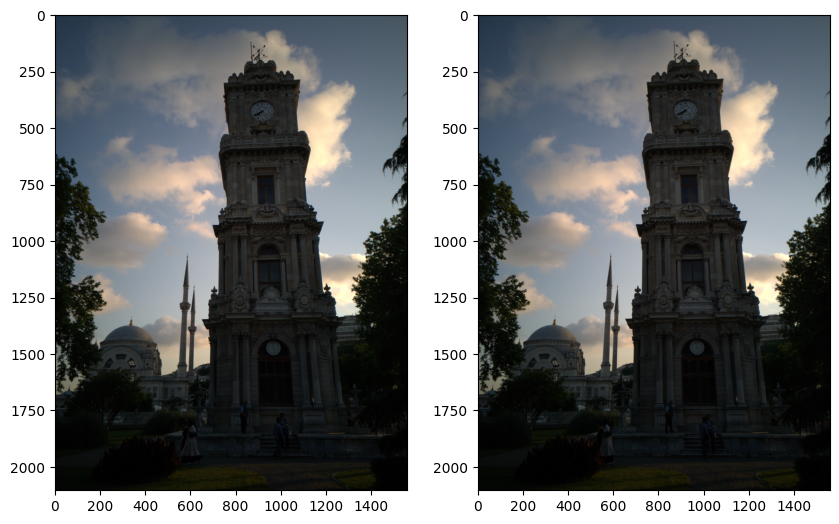

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10)) 
axes[0].imshow(img1)
axes[1].imshow(img2)

# Block-based optical flow

In [10]:
base = img1.astype(np.float32)
to_align = img2.astype(np.float32)

of_estimator = OpticalFlowProcessor()

In [11]:
start_time = time.time()
flow = of_estimator.align_block_based(base, to_align, depth=4)
print(f'Elapsed time: {time.time() - start_time:.2f} seconds')

Elapsed time: 12.37 seconds


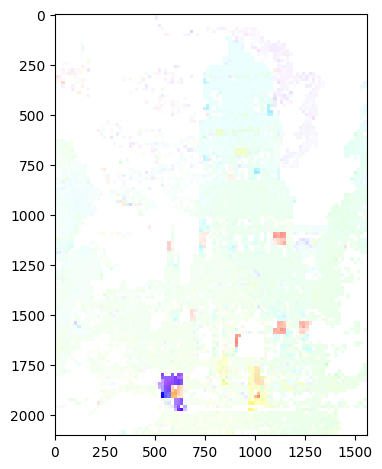

In [12]:
flow_color = flow_vis.flow_to_color(flow, convert_to_bgr=False)
skimage.io.imshow(flow_color)

## LK optical flow

In [13]:
flow_BB, flow_LK = of_estimator.get_lk_optical_flow(base, to_align)

alignment for shape (2104, 1560, 3) taken 43.434850454330444 seconds


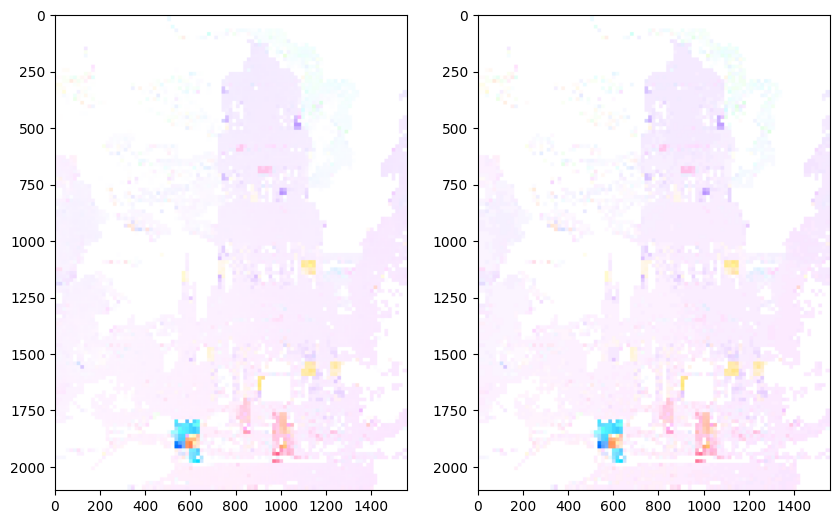

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(flow_vis.flow_to_color(flow_BB + flow_LK, convert_to_bgr=False))
axes[1].imshow(flow_vis.flow_to_color(flow_BB, convert_to_bgr=False))